In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
!pip install scikit-plot
import scikitplot as skplt
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install stop_words

# NLP modules
import nltk
import re 
import string
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob , Word
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Wordcloud Modules
from wordcloud import WordCloud , STOPWORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
color = sns.color_palette()
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)
nltk.download("stopwords")
nltk.download("all")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!

True

In [5]:
reviews_df=pd.read_csv('/content/drive/MyDrive/CMPE_257_Project/amazon_dataset/reviews_data.csv')
reviews_df.head(5)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,upc
0,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,8.90E+11
1,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,8.90E+11
2,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,8.90E+11
3,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-12-01T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,8.90E+11
4,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-11-28T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,8.90E+11


In [6]:
reviews_df.shape

(78343, 20)

In [7]:
#Columns/attributes and their datatypes
reviews_df.dtypes

id                      object
brand                   object
categories              object
dateAdded               object
dateUpdated             object
ean                     object
keys                    object
manufacturer            object
manufacturerNumber      object
name                    object
reviews.date            object
reviews.dateSeen        object
reviews.doRecommend     object
reviews.numHelpful     float64
reviews.rating         float64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
upc                     object
dtype: object

In [8]:
reviews_df.isnull().sum()

id                         0
brand                      0
categories                 0
dateAdded                  0
dateUpdated                0
ean                    36327
keys                       0
manufacturer            2808
manufacturerNumber       203
name                       0
reviews.date             128
reviews.dateSeen           0
reviews.doRecommend    40277
reviews.numHelpful     40022
reviews.rating           164
reviews.sourceURLs         0
reviews.text              41
reviews.title            480
reviews.username          96
upc                        2
dtype: int64

In [9]:
reviews_df = reviews_df.dropna(subset=['reviews.text']) #dropping null reviews text
reviews_df = reviews_df.dropna(subset=['reviews.title']) #dropping null reviews title
reviews_df = reviews_df.dropna(subset=['reviews.rating']) #dropping null ratings

In [10]:
reviews_df.shape

(77670, 20)

In [11]:
reviews_df.duplicated(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date']).sum()

761

In [12]:
reviews_df=reviews_df.drop_duplicates(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date'])

In [13]:
reviews_df.shape

(76909, 20)

In [14]:
reviews_df["full_review"] = reviews_df['reviews.title'].astype(str) +" "+ reviews_df["reviews.text"]

In [15]:
reviews_df["full_review"] = (
    reviews_df["full_review"]
    .str.lower()
    .str.replace("[^\w\s]", "")
    .str.replace("\d+", "")
    .str.replace("\n", " ")
    .replace("\r", "")
    .str.replace("[^a-zA-Z0-9\s]", "")
)

In [16]:
reviews_df['full_review']

0        love the fingerprint reader this keyboard is v...
1        nice its thin and light i can type pretty easi...
2        new i love the new design the keys are spaced ...
3        nice keyboard attached easily and firmly has a...
4        nice improvement our original keyboard was oka...
                               ...                        
78338    solves the problem im dealing with dry eyes an...
78339    great stuff great stuff helps keep my contacts...
78340                                my review right price
78341    wonderful product i was so pleased when this s...
78342    makes the holidays better excellent album make...
Name: full_review, Length: 76909, dtype: object

In [17]:
def word_cleaner(data):
    words = [re.sub("[^a-zA-Z]", " ", i) for i in data]
    words = [i.lower() for j in words for i in j.split()] # Split all the sentences into words
    words = [i for i in words if not i in set(stopwords.words("english"))] # Split all the sentences into words
    return words

In [18]:
word_frequency = pd.DataFrame(
    nltk.FreqDist(word_cleaner(reviews_df["full_review"])).most_common(25),
    columns=["Frequent_Words", "Frequency"],
)

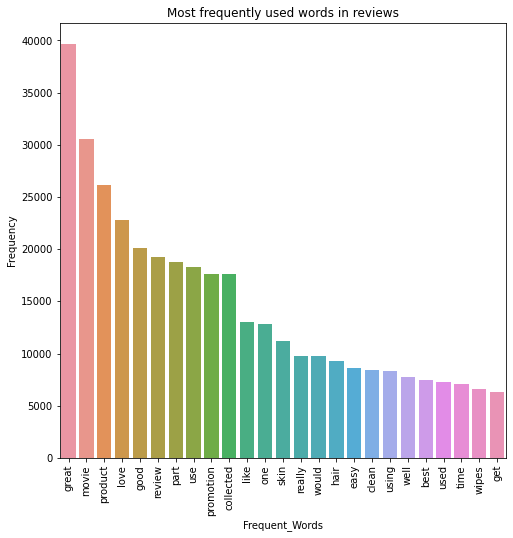

In [19]:
plt.figure(figsize=(8, 8))
plt.xticks(rotation=90)
plt.title("Most frequently used words in reviews")
sns.barplot(x="Frequent_Words", y="Frequency", data=word_frequency)

In [20]:
lemmatizer_output = WordNetLemmatizer()

reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: word_tokenize(x.lower())
)
reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: [word for word in x if word not in STOPWORDS]
)
reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: [lemmatizer_output.lemmatize(word) for word in x]
)
reviews_df["full_review"] = reviews_df["full_review"].apply(lambda x: " ".join(x))

In [21]:
reviews_df['full_review'].head(15)

0     love fingerprint reader keyboard easy type fin...
1                    nice thin light type pretty easily
2     new love new design key spaced well mi type fi...
3     nice keyboard attached easily firmly nice feel...
4     nice improvement original keyboard okay laptop...
5     big improvement purchased replace original sur...
6     perfect type cover find comfortable type rarel...
7     good keyboard good keyboard addition surface p...
8     nice improvement tough getting work surface pr...
9     fingerprint scanner worth money now quickly ha...
10             must must accessory surface pro computer
11    worth price fingerprint scanner price worth go...
12    great keyboard great cover keyboard feel surpr...
13    keyboard smooth really fingerprint id make log...
14    pricey good product expensive easy setup plent...
Name: full_review, dtype: object

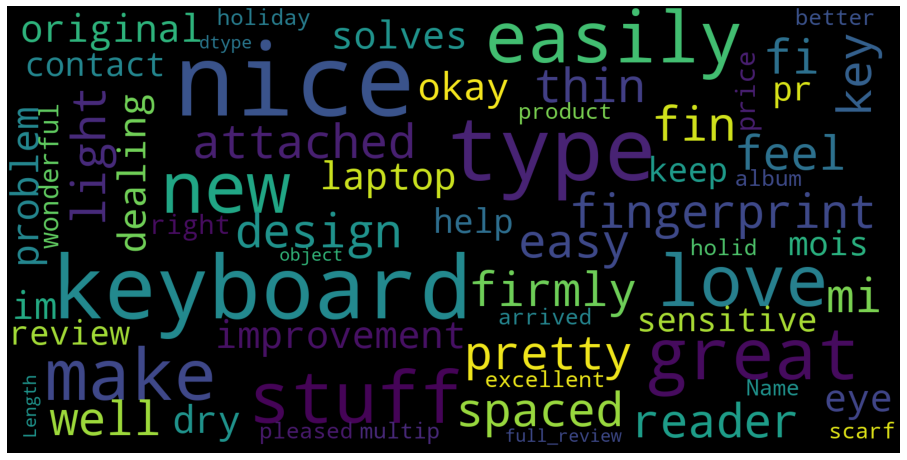

In [22]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=250,
        max_font_size=45,
        scale=4,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=21)
        fig.subplots_adjust(top=2.1)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(reviews_df["full_review"])


[Text(0.5, 1.0, 'Frequency of each rating')]

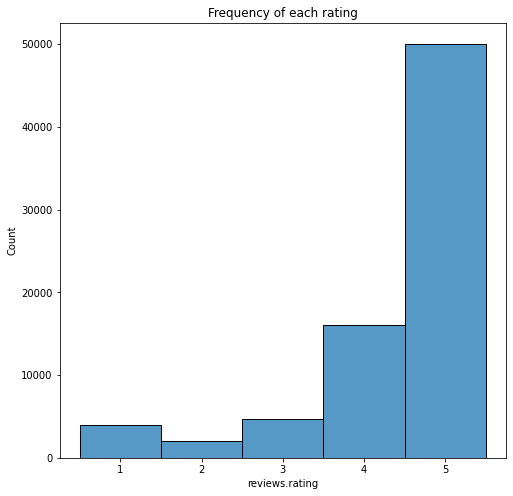

In [23]:
plt.figure(figsize=(8,8))
sns.histplot(data=reviews_df, x=reviews_df['reviews.rating'], discrete="True").set(title = "Frequency of each rating")

In [24]:
#review by brand
reviews_df.groupby(reviews_df['brand']).mean()['reviews.rating']

brand
4C Foods               5.000000
AMBI                   4.750000
ANCHOR BAY             4.766667
Adesso                 5.000000
Advantage              4.000000
                         ...   
Yes to Grapefruit      3.846154
Yosemite Home Decor    1.000000
Zyliss                 4.644068
bareMinerals           5.000000
iStarUSA               3.000000
Name: reviews.rating, Length: 397, dtype: float64

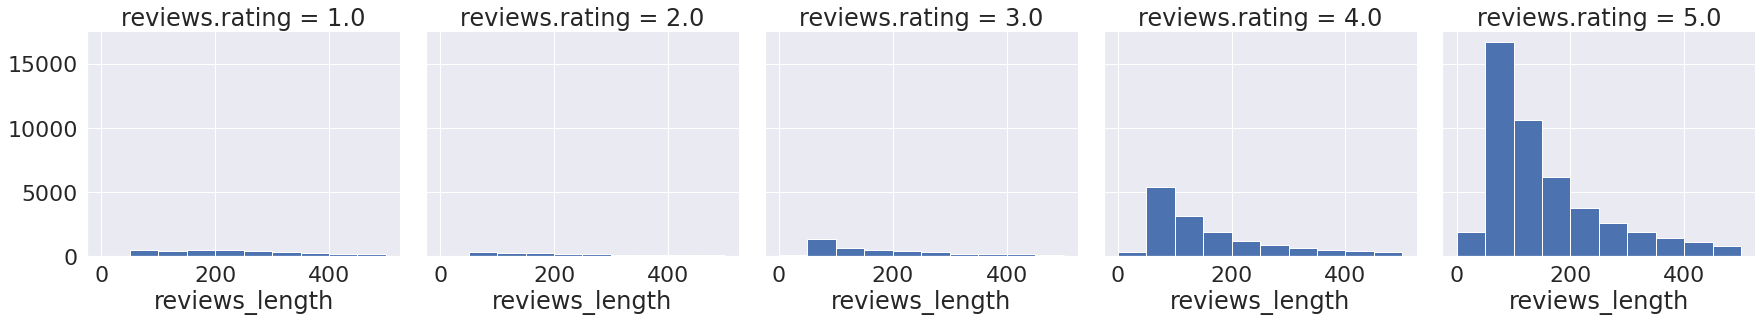

In [25]:
reviews_df["reviews_length"] = reviews_df["reviews.text"].apply(len)
sns.set(font_scale=2.0)

graph = sns.FacetGrid(reviews_df,col='reviews.rating',size=5)
graph.map(plt.hist,'reviews_length', range=[0, 500])

In [26]:
reviews_df['reviews.doRecommend'].fillna("N/A",inplace=True)

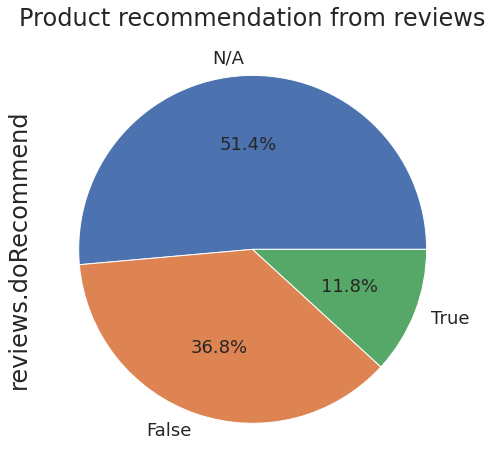

In [27]:
plt.figure(figsize = (8,8))
plt.title("Product recommendation from reviews")
reviews_df["reviews.doRecommend"].value_counts().plot.pie(autopct="%1.1f%%",textprops={'fontsize': 18})

Text(0, 0.5, 'No. of people that found the review helpful')

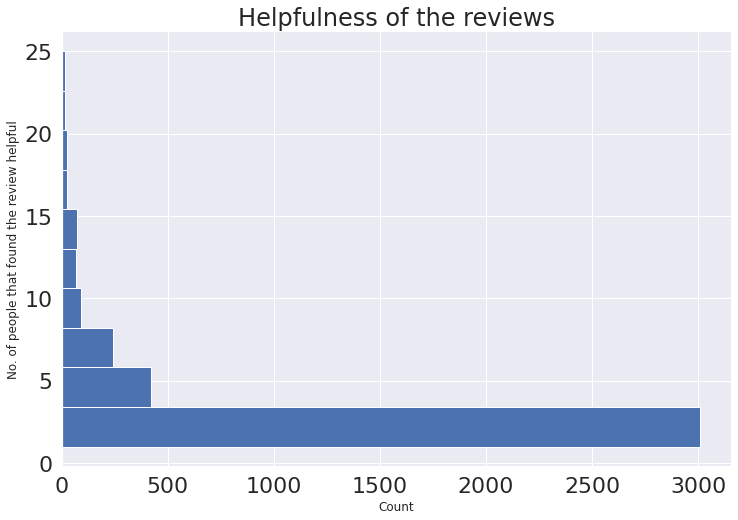

In [28]:
plt.figure(figsize=(12,8))
plt.hist(reviews_df['reviews.numHelpful'],range=[1, 25], orientation='horizontal')
plt.title("Helpfulness of the reviews")
plt.xlabel("Count", fontsize=12)
plt.ylabel("No. of people that found the review helpful", fontsize=12)

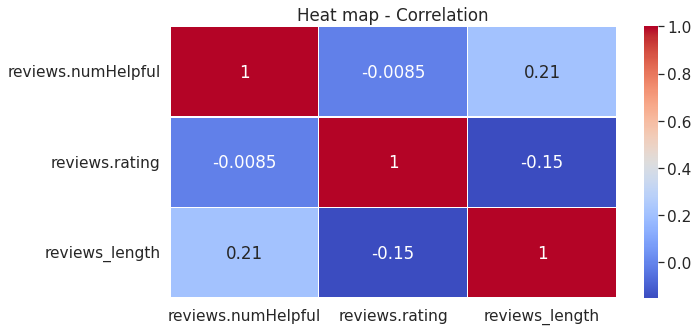

In [29]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
plt.title("Heat map - Correlation")
sns.heatmap(reviews_df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [30]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

whole_text = reviews_df['full_review']
train_text = reviews_df['full_review']
y_ratings = reviews_df['reviews.rating']

In [33]:
word_vec = TfidfVectorizer(sublinear_tf = True, strip_accents = 'unicode', analyzer = 'word', token_pattern = r'\w{1,}', stop_words = 'english', ngram_range = (1, 1), max_features=10000)
word_vec.fit(whole_text)
train_features = word_vec.transform(train_text)

In [34]:
train_features

<76909x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1251837 stored elements in Compressed Sparse Row format>

In [35]:
#Undersampling

nm = NearMiss()
X_undersample, y_undersample = nm.fit_resample(train_features, y_ratings)

In [36]:
#Oversampling

smote = SMOTE(random_state=42)
X_oversample, y_oversample= smote.fit_resample(train_features, y_ratings)

In [37]:
print('Original dataset shape %s' % Counter(y_ratings))
print('Undersampled dataset shape %s' % Counter(y_undersample))
print('Oversampled dataset shape %s' % Counter(y_oversample))

Original dataset shape Counter({5.0: 50041, 4.0: 16101, 3.0: 4743, 1.0: 3990, 2.0: 2034})
Undersampled dataset shape Counter({1.0: 2034, 2.0: 2034, 3.0: 2034, 4.0: 2034, 5.0: 2034})
Oversampled dataset shape Counter({5.0: 50041, 4.0: 50041, 3.0: 50041, 2.0: 50041, 1.0: 50041})


In [38]:
from sklearn.model_selection import train_test_split
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(train_features, y_ratings, test_size=0.3, random_state=101)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversample, y_oversample, test_size=0.3, random_state=101)

ExtraTreesClassifier

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

etc_us = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc_us.fit(X_train_us,y_train_us)
etc_pred_us = etc_us.predict(X_test_us)
print(etc_pred_us)
etc_us.score(X_train_us, y_train_us)

[4. 1. 1. ... 1. 3. 2.]


0.9969096783256075

In [40]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train,y_train)
etc_pred = etc.predict(X_test)
print(etc_pred)
etc.score(X_train, y_train)

[5. 5. 5. ... 5. 5. 5.]


0.999238427817817

In [41]:
etc_os = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc_os.fit(X_train_os,y_train_os)
etc_pred_os = etc_os.predict(X_test_os)
print(etc_pred_os)
etc_os.score(X_train_os, y_train_os)

[2. 5. 4. ... 4. 5. 1.]


0.9997373574736073

In [42]:
from sklearn.metrics import classification_report
print("Classification report for Undersampled data using ExtraTreeClassifier.")
print(classification_report(y_test_us, etc_pred_us, labels=[1, 2, 3, 4, 5]))
print("\nClassification report for Original (no resampling) data using ExtraTreeClassifier.")
print(classification_report(y_test, etc_pred, labels=[1, 2, 3, 4, 5]))
print("\nClassification report for Oversampled data using ExtraTreeClassifier.")
print(classification_report(y_test_os, etc_pred_os, labels=[1, 2, 3, 4, 5]))

Classification report for Undersampled data using ExtraTreeClassifier.
              precision    recall  f1-score   support

           1       0.73      0.79      0.76       608
           2       0.61      0.56      0.59       589
           3       0.59      0.52      0.56       621
           4       0.51      0.40      0.45       638
           5       0.57      0.77      0.66       595

    accuracy                           0.61      3051
   macro avg       0.60      0.61      0.60      3051
weighted avg       0.60      0.61      0.60      3051


Classification report for Original (no resampling) data using ExtraTreeClassifier.
              precision    recall  f1-score   support

           1       0.82      0.59      0.68      1191
           2       0.94      0.14      0.24       630
           3       0.71      0.21      0.32      1413
           4       0.65      0.17      0.27      4873
           5       0.72      0.98      0.83     14966

    accuracy                  

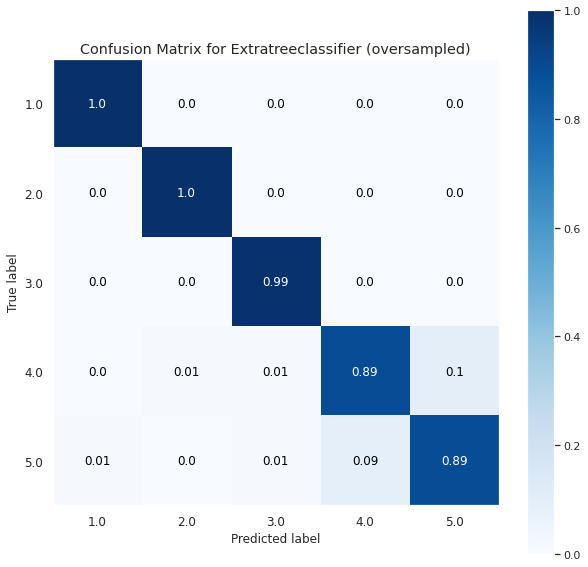

In [43]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_confusion_matrix(y_test_os, etc_pred_os, normalize=True, title = 'Confusion Matrix for Extratreeclassifier (oversampled)')
plt.show()

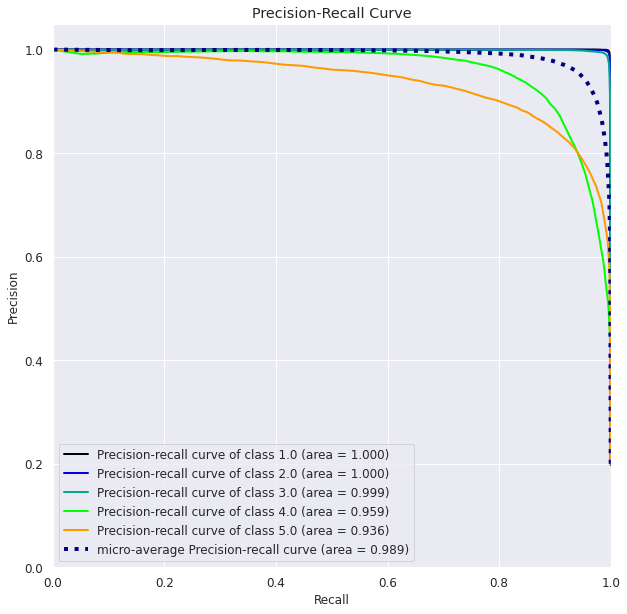

In [44]:
probas3 = etc_os.predict_proba(X_test_os)
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_precision_recall_curve(y_test_os, probas3)
plt.show()

In [45]:
from sklearn.metrics import log_loss
probas3_us = etc_us.predict_proba(X_test_us)
probas3_ = etc.predict_proba(X_test)
print("Log loss for undersampled data on ExtraTreeClassifier")
print(log_loss(y_test_us, probas3_us))
print("\nLog loss for original (no resampling) data on ExtraTreeClassifier")
print(log_loss(y_test, probas3_))
print("\nLog loss for oversampled data on ExtraTreeClassifier")
print(log_loss(y_test_os, probas3))

Log loss for undersampled data on ExtraTreeClassifier
1.1298959675569595

Log loss for original (no resampling) data on ExtraTreeClassifier
0.8320153771266815

Log loss for oversampled data on ExtraTreeClassifier
0.26999153822693256


SVM - SVClassifier

In [46]:
from sklearn.svm import SVC
svc_us = SVC(kernel='linear', random_state=32)
svc_us.fit(X_train_us,y_train_us)
svc_pred_us = svc_us.predict(X_test_us)
print(svc_pred_us)
svc_us.score(X_train_us, y_train_us)

[4. 1. 4. ... 2. 3. 2.]


0.7596572552324765

In [47]:
svc = SVC(kernel='linear', random_state=32)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(svc_pred)
svc.score(X_train, y_train)

[5. 3. 5. ... 5. 5. 5.]


0.7661416152760234

In [48]:
from sklearn.metrics import classification_report
print("Classification report for Undersampled data using SVC.")
print(classification_report(y_test_us, svc_pred_us, labels=[1, 2, 3, 4, 5]))
print("\nClassification report for Original (no resampling) data using SVC.")
print(classification_report(y_test, svc_pred, labels=[1, 2, 3, 4, 5]))

Classification report for Undersampled data using SVC.
              precision    recall  f1-score   support

           1       0.69      0.73      0.71       608
           2       0.54      0.59      0.56       589
           3       0.57      0.50      0.54       621
           4       0.48      0.42      0.45       638
           5       0.59      0.66      0.62       595

    accuracy                           0.58      3051
   macro avg       0.58      0.58      0.58      3051
weighted avg       0.57      0.58      0.57      3051


Classification report for Original (no resampling) data using SVC.
              precision    recall  f1-score   support

           1       0.69      0.73      0.71      1191
           2       0.39      0.10      0.16       630
           3       0.48      0.25      0.33      1413
           4       0.51      0.17      0.25      4873
           5       0.75      0.96      0.84     14966

    accuracy                           0.72     23073
   macro

Custom test cases

In [49]:
custom_test = word_vec.transform(["so satisfied with the purchase good product works well", "this device feels ok it works fine", "really disappointed with the purchase defective product not working", "used to be good but since the change the worst product ever", "used to be bad but from when it was updated it is the best product ever"])

In [50]:
etc_us.predict(custom_test)

array([4., 3., 1., 1., 1.])

In [51]:
etc.predict(custom_test)

array([4., 3., 1., 1., 5.])

In [52]:
etc_os.predict(custom_test)

array([4., 3., 1., 1., 5.])

In [53]:
svc_us.predict(custom_test)

array([4., 3., 2., 1., 2.])

In [54]:
svc.predict(custom_test)

array([5., 3., 1., 1., 5.])